In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib notebook

In [2]:
import os
os.chdir('E:\Workshop\Python\Dataset')

### Data exploration

In [3]:
# data source: https://www.kaggle.com/zynicide/wine-reviews/data
df = pd.read_csv('winemag-data_first150k.csv', index_col='Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [5]:
# Check variable with missing values
df.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

<IPython.core.display.Javascript object>


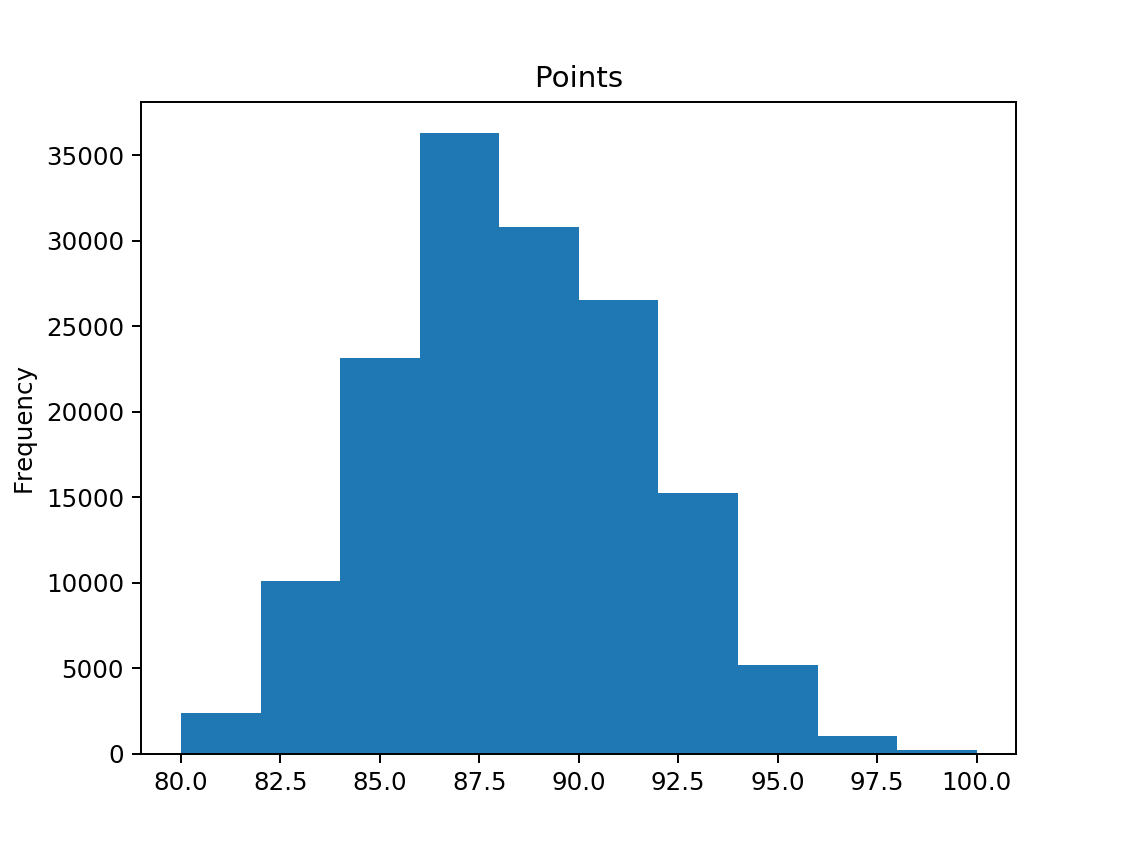

In [7]:
# distribution of wine points by histogram
df['points'].plot(kind='hist',title='Points')

<IPython.core.display.Javascript object>


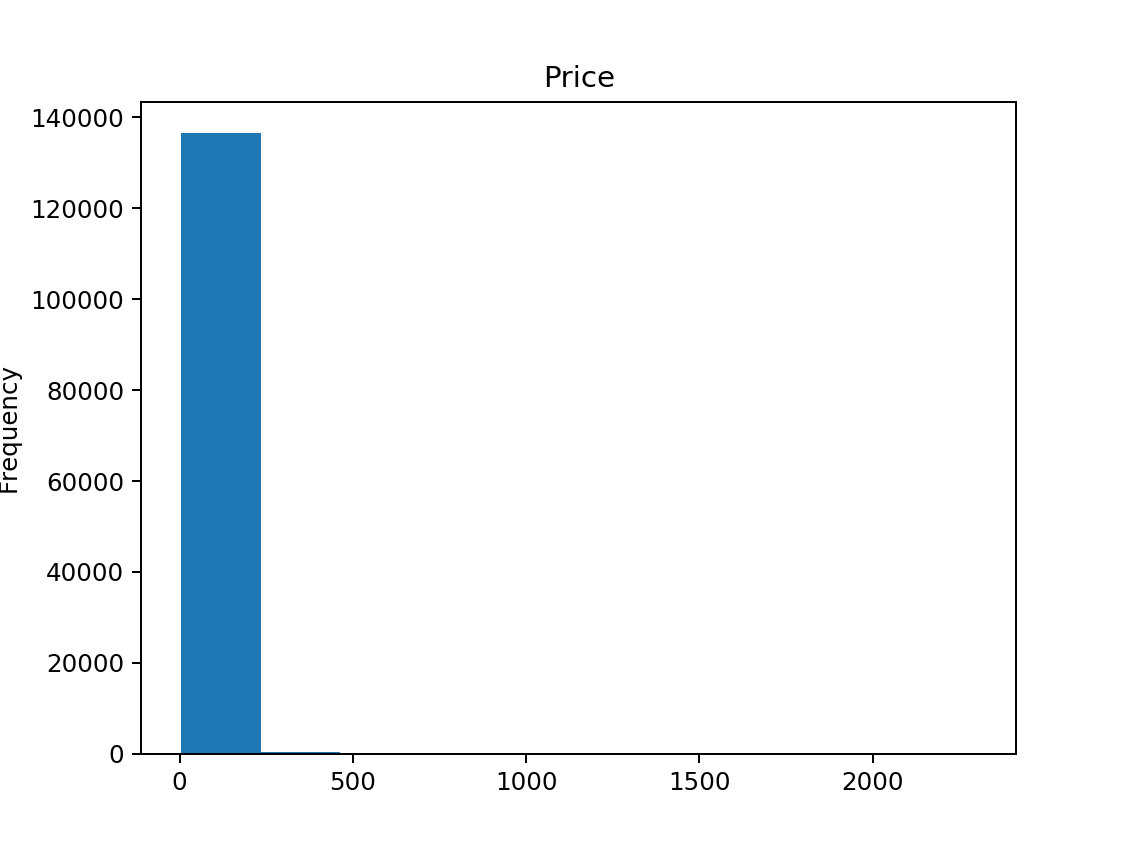

In [8]:
# distribution of wine price by histogram
df['price'].plot(kind='hist',title='Price')

In [9]:
# Check special outliers
df[df['price'] > 1000]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10651,Austria,"Wet earth, rain-wet stones, damp moss, wild sa...",Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Grüner Veltliner,Emmerich Knoll
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
34927,France,"Such a generous and ripe wine, with a dark cor...",NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
34939,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96,1300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Mouton Rothschild
34942,France,"Solid, very structured, packed with dense and ...",NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug


<IPython.core.display.Javascript object>


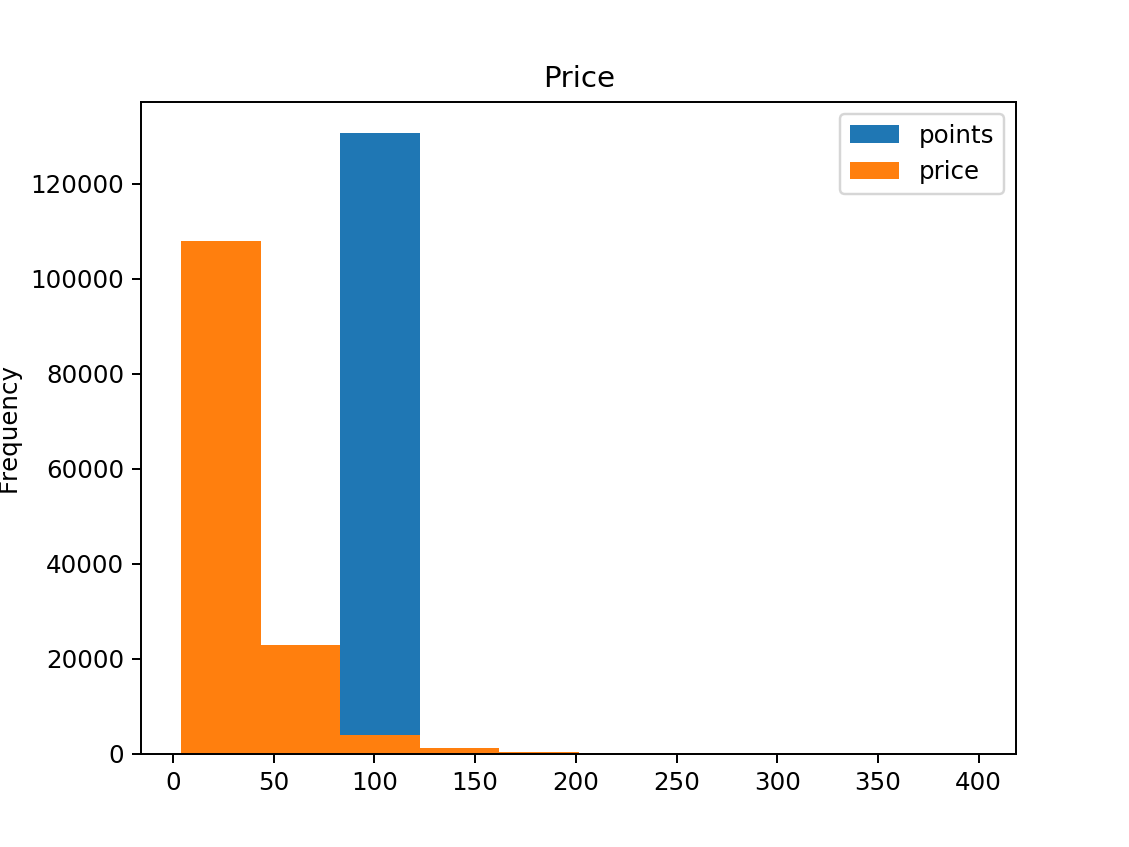

In [10]:
df[df['price']<400].plot(kind = 'hist', title = 'Price')

### Cost Performance 

In [11]:
# Define Cost Performance as user satisfaction 
df['cost performance'] = df['points']/df['price']

In [12]:
df.sort_values(['cost performance'], ascending=False).head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,cost performance
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.5
99045,Portugal,"This is a ripe-fruited wine, rich with dried f...",Toutalga,86,4.0,Alentejano,NaN,NaN,Portuguese Red,Herdade dos Machados,21.5
48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.5
126595,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.5
80185,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.5


<IPython.core.display.Javascript object>


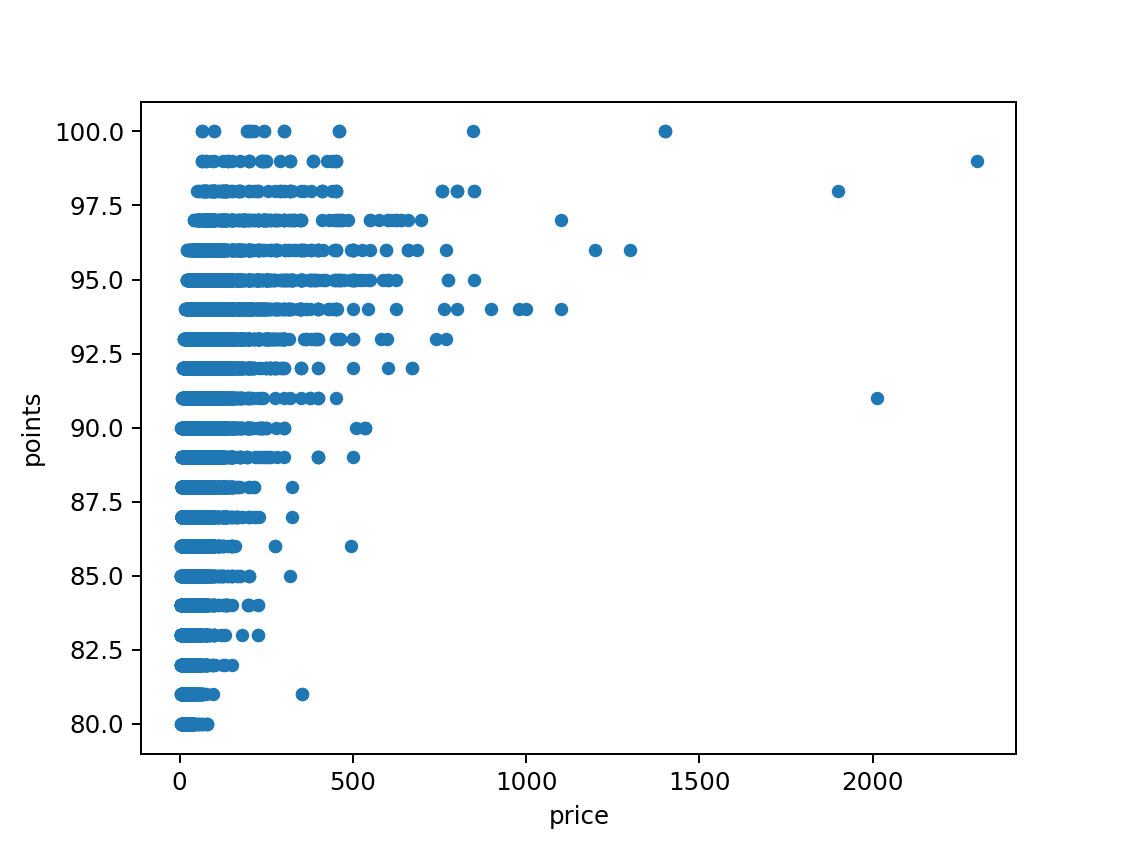

In [13]:
# relationship between points and price
df.plot(kind='scatter', x='price', y='points')

###  Wine Country

In [14]:
df['country'].value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

<IPython.core.display.Javascript object>


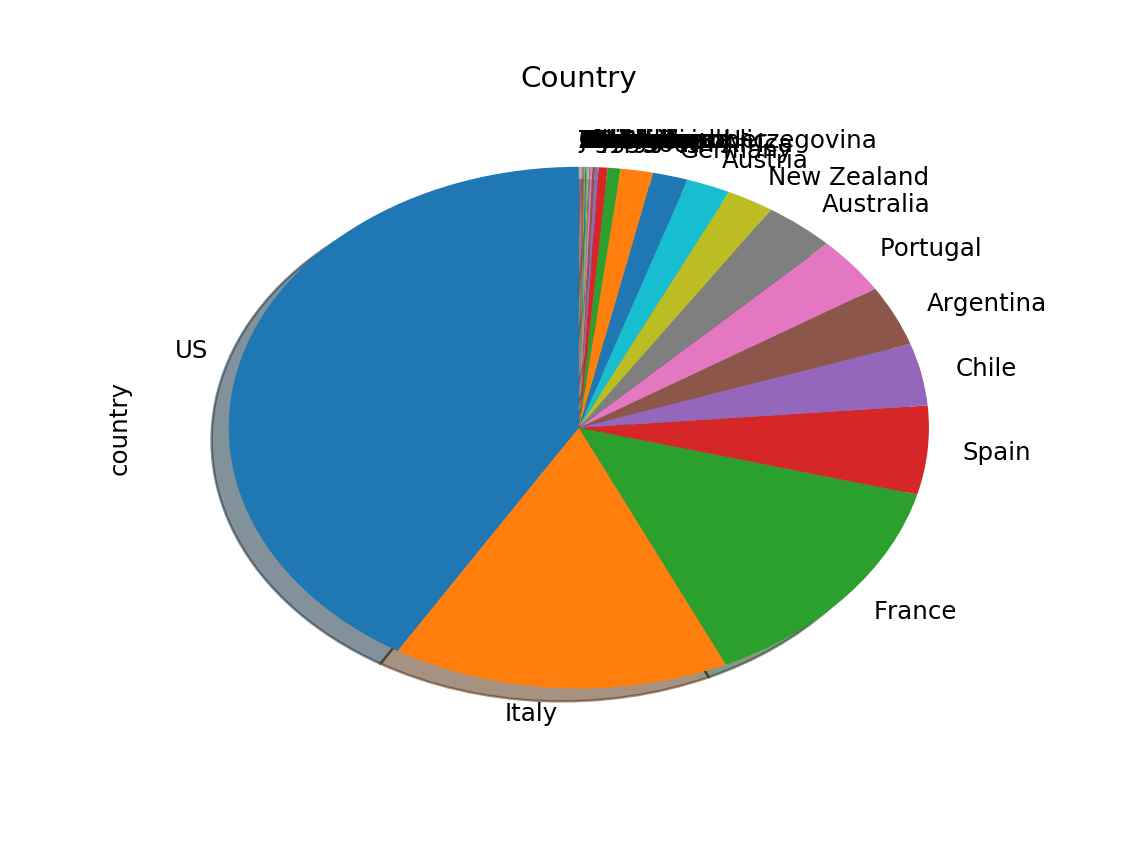

In [15]:
df['country'].value_counts().plot(kind='pie', shadow=True, startangle=90, title='Country')

### Grape Varieties of Wine 

In [16]:
df['variety'].value_counts().head()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

<IPython.core.display.Javascript object>


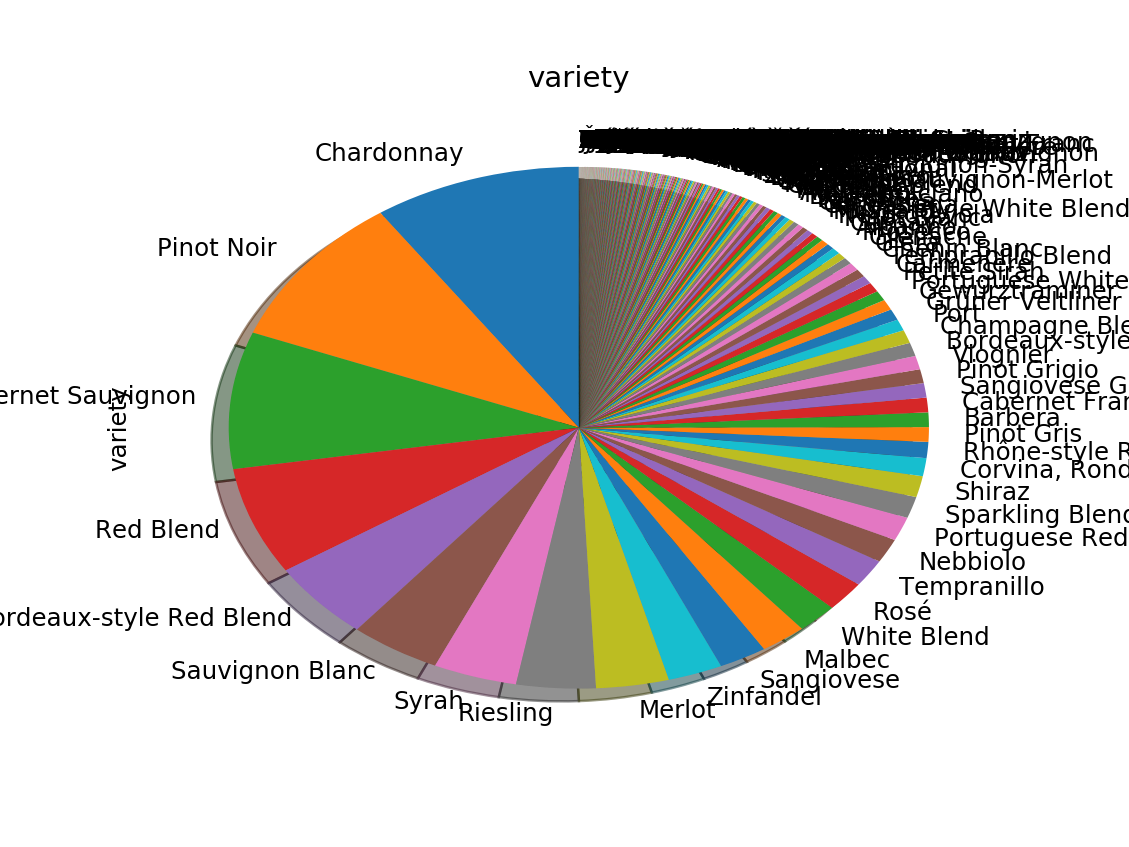

In [18]:
df['variety'].value_counts().plot(kind='pie', shadow=True, startangle=90, title='variety')

### Winery Infomation

In [19]:
df['winery'].value_counts().head()

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
Name: winery, dtype: int64

In [20]:
# Average wine Price in each winery
winery_price = df['price'].groupby(df['winery']).mean()

In [21]:
# Rank top experiensive winery
winery_odr = winery_price.sort_values(ascending = False).head()
winery_odr

winery
Blair                            1029.000000
Château Latour                    794.400000
Masseto                           587.500000
Château Haut-Brion                569.090909
Château La Mission Haut-Brion     568.166667
Name: price, dtype: float64

<IPython.core.display.Javascript object>


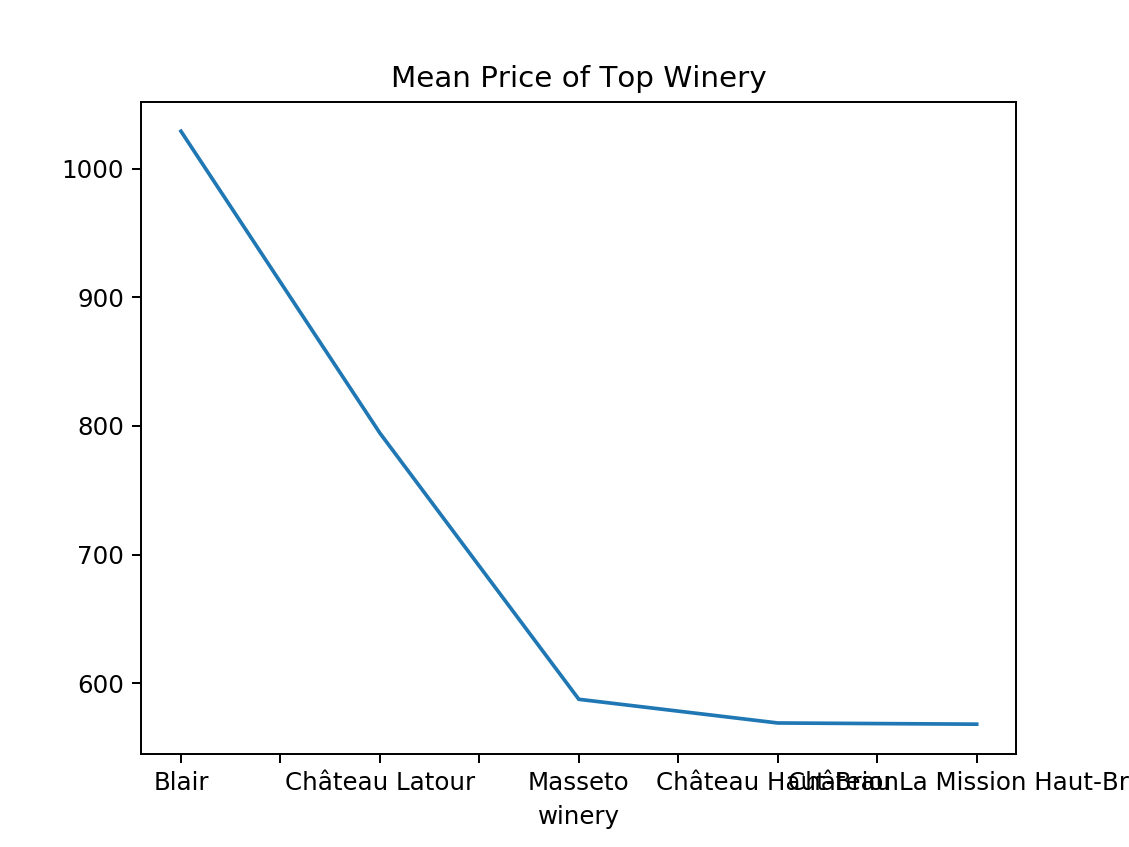

In [22]:
winery_odr.plot(kind='line',title='Mean Price of Top Winery')